A Basic boiler-plate for the task has been given, implement the task using numpy only, do not use opencv!

In [23]:
#importing the necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

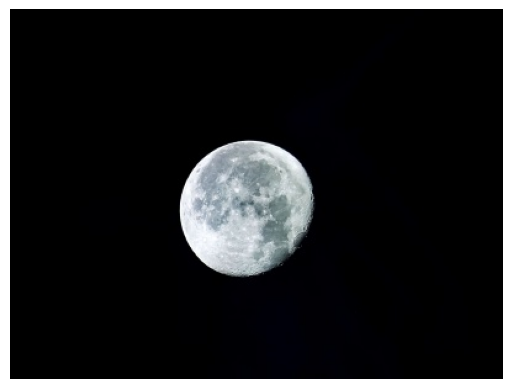

In [24]:
# Load an image from file
moon = cv.imread('./images/moon.jpg')

# Display the image using matplotlib
plt.imshow(cv.cvtColor(moon, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


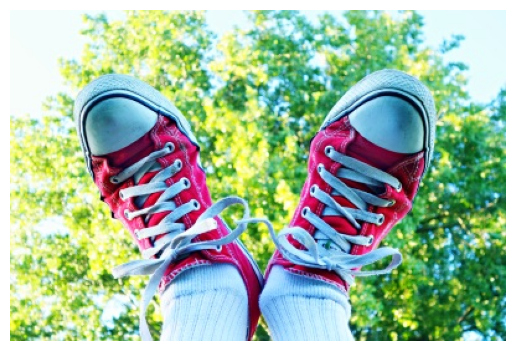

In [25]:
# Load an image from file
sneakers = cv.imread('./images/sneakers.jpg')

# Display the image using matplotlib
plt.imshow(cv.cvtColor(sneakers, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


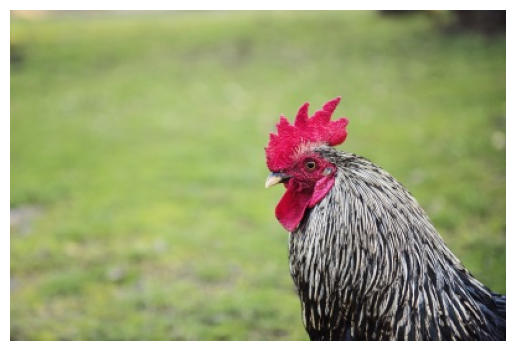

In [26]:
# Load an image from file
rooster = cv.imread('./images/rooster.jpg')

# Display the image using matplotlib
plt.imshow(cv.cvtColor(rooster, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
rooster1 = cv.cvtColor(rooster, cv.COLOR_BGR2RGB)

In [27]:
#converting images to numpy arrays
# Convert the image to a NumPy array
rooster_array = np.array(rooster)
moon_array = np.array(moon)
sneakers_array = np.array(sneakers)
# Now you can work with the NumPy array
# For example, you can print the shape of the array
print("Shape of the rooster array:", rooster_array.shape)
print("Shape of the moon array:", moon_array.shape)
print("Shape of the sneakers array:", sneakers_array.shape)



Shape of the rooster array: (267, 400, 3)
Shape of the moon array: (300, 400, 3)
Shape of the sneakers array: (267, 400, 3)


In [28]:
#Just an example of working with images
print(rooster_array[200][150][0], "blue")
print(rooster_array[200][150][1], "green")
print(rooster_array[200][150][2], "red")
rooster1_array = np.array(rooster1)
print(rooster1_array[200][150][0], "blue")
print(rooster1_array[200][150][1], "green")
print(rooster1_array[200][150][2], "red")

123 blue
185 green
179 red
179 blue
185 green
123 red


In [29]:
#images have been read and the image matrices extracted for you

In [61]:
#implement the convolution function
def convolution(image, kernel_matrix):
    kernel_size = kernel_matrix.shape[0]
    padding = kernel_size // 2
    padded_image = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='reflect')
    convolved_image = np.zeros_like(image, dtype=float)  # Use float for better precision

    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            for c in range(image.shape[2]):
                region = padded_image[x:x + kernel_size, y:y + kernel_size, c]
                convolved_image[x, y, c] = np.sum(region * kernel_matrix)
    return np.clip(convolved_image, 0, 255).astype(np.uint8)


In [62]:
# mean blur
def mean_blur(image, kernel_size):
    kernel_matrix = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    return convolution(image, kernel_matrix)

In [81]:
def sharpen_image(image, kernel_size):
    kernel_matrix = np.array([
        [0, -1, -1],
        [-1, 9, -1],
        [0, -1, -]
    ])
    return convolution(image, kernel_matrix)

In [64]:
def erode_image(image):
    kernel_size = 3
    kernel_matrix = np.ones((kernel_size, kernel_size), dtype=np.uint8)
    eroded_image = np.zeros_like(image)

    for x in range(image.shape[0] - kernel_size + 1):
        for y in range(image.shape[1] - kernel_size + 1):
            for c in range(image.shape[2]):
                region = image[x:x + kernel_size, y:y + kernel_size, c]
                eroded_image[x + 1, y + 1, c] = np.min(region * kernel_matrix)
    return eroded_image

In [65]:
def dilate_image(image):
    kernel_size = 3
    kernel_matrix = np.ones((kernel_size, kernel_size), dtype=np.uint8)
    dilated_image = np.zeros_like(image)

    for x in range(image.shape[0] - kernel_size + 1):
        for y in range(image.shape[1] - kernel_size + 1):
            for c in range(image.shape[2]):
                region = image[x:x + kernel_size, y:y + kernel_size, c]
                dilated_image[x + 1, y + 1, c] = np.max(region * kernel_matrix)
    return dilated_image

In [66]:
def edge_detect(image, kernel_size):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    edge_x = convolution(image, sobel_x)
    edge_y = convolution(image, sobel_y)
    edges = np.sqrt(edge_x.astype(float) ** 2 + edge_y.astype(float) ** 2)
    return np.clip(edges, 0, 255).astype(np.uint8)

In [74]:
#to see moon and sneakers change name
rooster=moon
rooster_array=moon_array

# rooster = sneakers
# roster_array= sneakers_array

In [75]:
#rooster
rooster_blur = mean_blur(rooster_array, 3)
rooster_edges = edge_detect(rooster, 7)
rooster_sharpen = sharpen_image(rooster_array, 5)
rooster_erode = erode_image(rooster_array)
rooster_dilate = dilate_image(rooster_array)

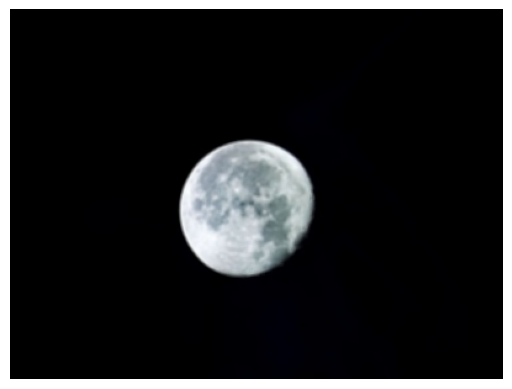

In [76]:
rgb_array = cv.cvtColor(rooster_blur, cv.COLOR_BGR2RGB)
#Rooster blur
# Display the RGB array using Matplotlib
plt.imshow(rgb_array)
plt.axis('off')
plt.show()

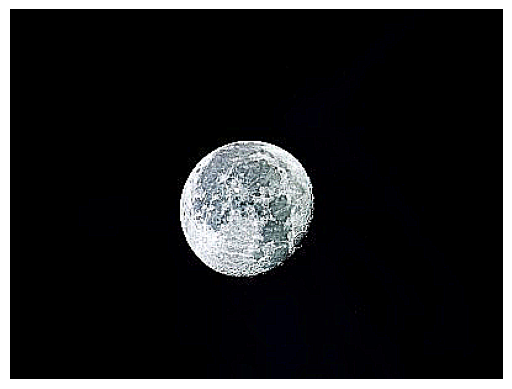

In [82]:
rgb_array = cv.cvtColor(rooster_sharpen, cv.COLOR_BGR2RGB)
#Rooster sharpen
# Display the RGB array using Matplotlib
plt.imshow(rgb_array)
plt.axis('off')
plt.show()

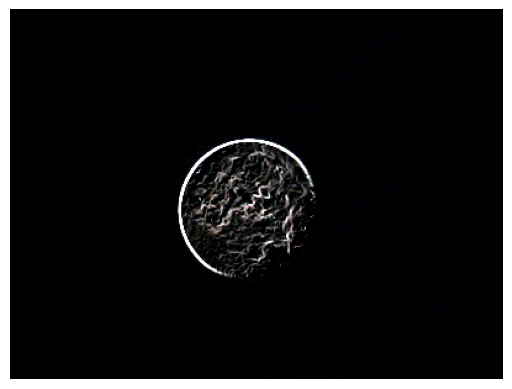

In [78]:
rgb_array = cv.cvtColor(rooster_edges, cv.COLOR_BGR2RGB)
#Rooster edges
# Display the RGB array using Matplotlib
plt.imshow(rgb_array)
plt.axis('off')
plt.show()

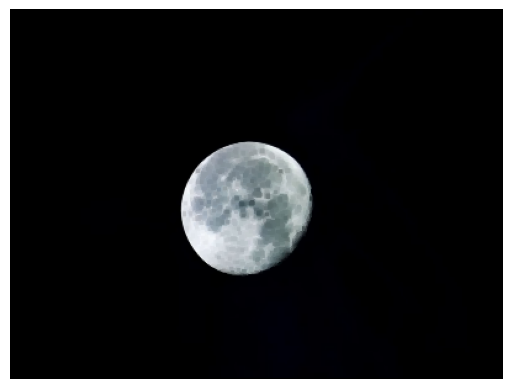

In [79]:
rgb_array = cv.cvtColor(rooster_erode, cv.COLOR_BGR2RGB)
#Rooster erode
# Display the RGB array using Matplotlib
plt.imshow(rgb_array)
plt.axis('off')
plt.show()

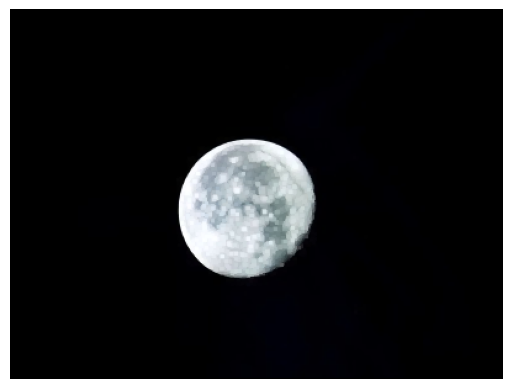

In [80]:
rgb_array = cv.cvtColor(rooster_dilate, cv.COLOR_BGR2RGB)
#Rooster dilate
# Display the RGB array using Matplotlib
plt.imshow(rgb_array)
plt.axis('off')
plt.show()